### __Load Data__

In [2]:
import model_utils
import pandas as pd

merged_hornsea = pd.read_parquet("preprocessed_hornsea_with_energy.parquet")
merged_pes = pd.read_parquet("preprocessed_pes_with_energy.parquet")

### __Feature Engineering__

In [2]:
import importlib
import Preprocessing
importlib.reload(Preprocessing)



feature_engineerer_wind = Preprocessing.FeatureEngineerer(label = 'Wind_MWh_credit', columns_to_ohe = ['unavailabilityType', 'affectedUnit'])
feature_engineerer_wind.perform_feature_engineering(merged_hornsea, deployment = False)

feature_engineerer_solar = Preprocessing.FeatureEngineerer(label = "Solar_MWh_credit")
feature_engineerer_solar.perform_feature_engineering(merged_pes, deployment = False)

merged_pes_simple = merged_pes[['solar_down_rad', 'Solar_MWh_credit', 'Wind_MWh_credit']]
feature_engineerer_solar_baseline = Preprocessing.FeatureEngineerer(label = 'Solar_MWh_credit')
feature_engineerer_solar_baseline.perform_feature_engineering(merged_pes_simple, deployment = False)

merged_hornsea_simple = merged_hornsea[['wind_speed_100', 'Solar_MWh_credit', 'Wind_MWh_credit']]
feature_engineerer_wind_baseline = Preprocessing.FeatureEngineerer(label = 'Wind_MWh_credit')
feature_engineerer_wind_baseline.perform_feature_engineering(merged_hornsea_simple, deployment = False)

### __Baseline wind energy forecast__

In [3]:
import model_utils
import numpy as np
import importlib
importlib.reload(model_utils)

quantiles = np.arange(0.1, 1.0, 0.1)
quantiles = np.round(quantiles, 1)

# Specify model save directory
model_save_dir_qr = "qr_model_wind"

qr_model_wind = model_utils.QuantileRegressorModel(feature_engineerer_wind_baseline, quantiles, model_save_dir=model_save_dir_qr, load_pretrained=True)
qr_model_wind.train_and_predict()  # This will skip training for already loaded models
print(f"Quantile Regressor Pinball Score: {qr_model_wind.pinball_score()}")

Loaded pretrained Quantile Regressor model for quantile 0.1 from qr_model_wind\qr_model_quantile_0.1.pkl
Loaded pretrained Quantile Regressor model for quantile 0.2 from qr_model_wind\qr_model_quantile_0.2.pkl
Loaded pretrained Quantile Regressor model for quantile 0.3 from qr_model_wind\qr_model_quantile_0.3.pkl
Loaded pretrained Quantile Regressor model for quantile 0.4 from qr_model_wind\qr_model_quantile_0.4.pkl
Loaded pretrained Quantile Regressor model for quantile 0.5 from qr_model_wind\qr_model_quantile_0.5.pkl
Loaded pretrained Quantile Regressor model for quantile 0.6 from qr_model_wind\qr_model_quantile_0.6.pkl
Loaded pretrained Quantile Regressor model for quantile 0.7 from qr_model_wind\qr_model_quantile_0.7.pkl
Loaded pretrained Quantile Regressor model for quantile 0.8 from qr_model_wind\qr_model_quantile_0.8.pkl
Loaded pretrained Quantile Regressor model for quantile 0.9 from qr_model_wind\qr_model_quantile_0.9.pkl
Using the loaded pretrained Quantile Regressor model fo

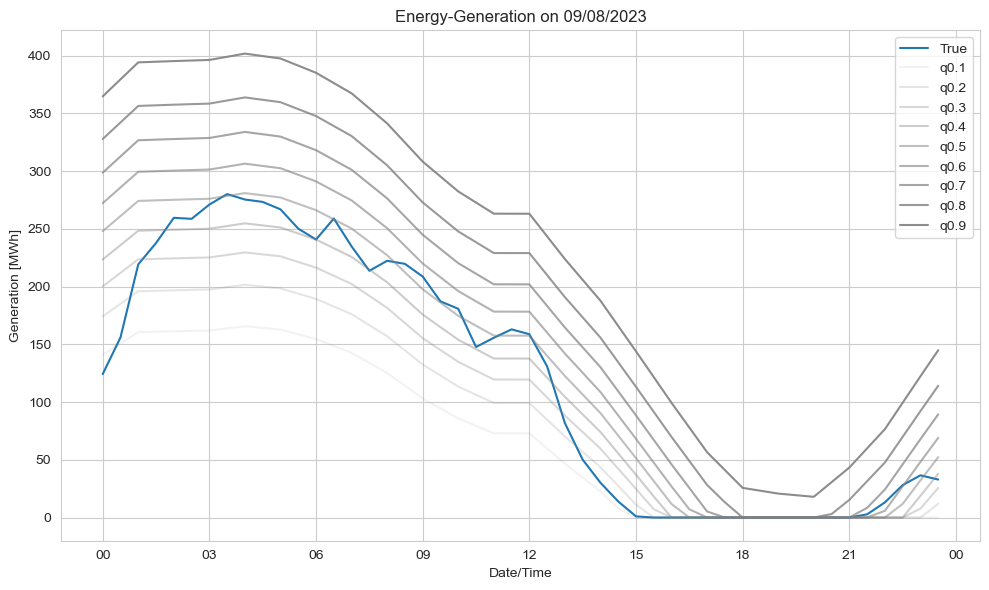

In [4]:
qr_model_wind.plot_quantils(feature_engineerer_wind_baseline.y_test.index, qr_model_wind.q_predictions, quantiles=quantiles, year=2023, month=8, day=9)

### __Baseline solar energy forecast__

In [5]:
quantiles = np.arange(0.1, 1.0, 0.1)
quantiles = np.round(quantiles, 1)

# Specify model save directory
model_save_dir_qr = "qr_model_solar"

qr_model_solar = model_utils.QuantileRegressorModel(feature_engineerer_solar_baseline, quantiles, model_save_dir=model_save_dir_qr, load_pretrained=True)
qr_model_solar.train_and_predict()  # This will skip training for already loaded models
print(f"Quantile Regressor Pinball Score: {qr_model_solar.pinball_score()}")

Loaded pretrained Quantile Regressor model for quantile 0.1 from qr_model_solar\qr_model_quantile_0.1.pkl
Loaded pretrained Quantile Regressor model for quantile 0.2 from qr_model_solar\qr_model_quantile_0.2.pkl
Loaded pretrained Quantile Regressor model for quantile 0.3 from qr_model_solar\qr_model_quantile_0.3.pkl
Loaded pretrained Quantile Regressor model for quantile 0.4 from qr_model_solar\qr_model_quantile_0.4.pkl
Loaded pretrained Quantile Regressor model for quantile 0.5 from qr_model_solar\qr_model_quantile_0.5.pkl
Loaded pretrained Quantile Regressor model for quantile 0.6 from qr_model_solar\qr_model_quantile_0.6.pkl
Loaded pretrained Quantile Regressor model for quantile 0.7 from qr_model_solar\qr_model_quantile_0.7.pkl
Loaded pretrained Quantile Regressor model for quantile 0.8 from qr_model_solar\qr_model_quantile_0.8.pkl
Loaded pretrained Quantile Regressor model for quantile 0.9 from qr_model_solar\qr_model_quantile_0.9.pkl
Using the loaded pretrained Quantile Regressor

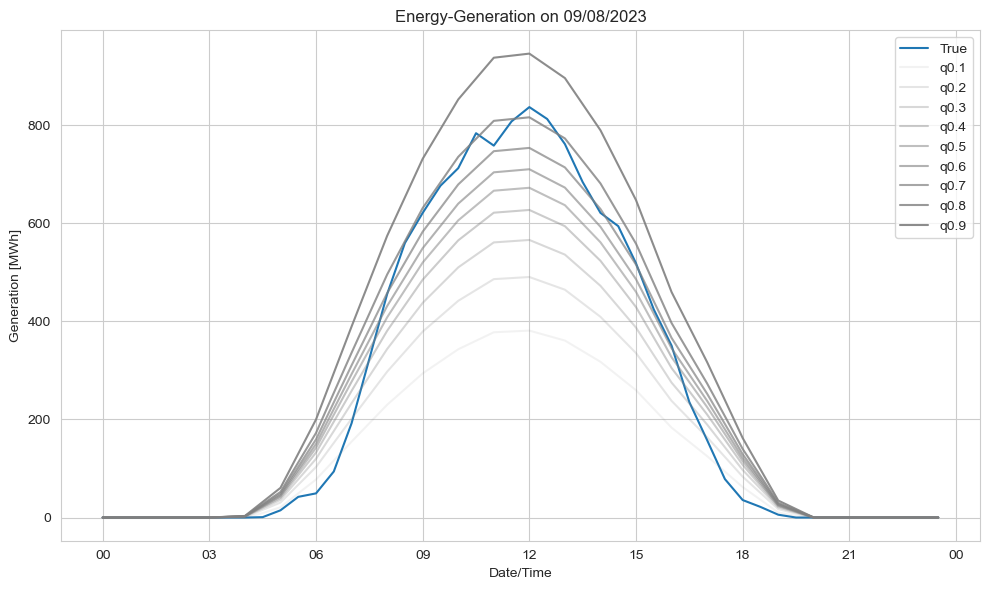

In [6]:
qr_model_solar.plot_quantils(daterange=feature_engineerer_solar_baseline.y_test.index, y=qr_model_solar.q_predictions, quantiles=quantiles, year=2023, month=8, day=9)

### __LightGBM wind energy forecast__

In [124]:
importlib.reload(model_utils)

quantiles = np.arange(0.1, 1.0, 0.1)
quantiles = np.round(quantiles, 1)

# Specify model save directory
model_save_dir_qr = "lgbm_model_wind"

lgbm_model_wind = model_utils.LGBMRegressorModel(feature_engineerer_wind, quantiles, model_save_dir=model_save_dir_qr, load_pretrained=True)
lgbm_model_wind.train_and_predict()  # This will skip training for already loaded models
print(f"Quantile Regressor Pinball Score: {lgbm_model_wind.pinball_score()}")

Loaded pretrained Quantile Regressor model for quantile 0.1 from lgbm_model_wind\lgbm_model_quantile_0.1.pkl
Loaded pretrained Quantile Regressor model for quantile 0.2 from lgbm_model_wind\lgbm_model_quantile_0.2.pkl
Loaded pretrained Quantile Regressor model for quantile 0.3 from lgbm_model_wind\lgbm_model_quantile_0.3.pkl
Loaded pretrained Quantile Regressor model for quantile 0.4 from lgbm_model_wind\lgbm_model_quantile_0.4.pkl
Loaded pretrained Quantile Regressor model for quantile 0.5 from lgbm_model_wind\lgbm_model_quantile_0.5.pkl
Loaded pretrained Quantile Regressor model for quantile 0.6 from lgbm_model_wind\lgbm_model_quantile_0.6.pkl
Loaded pretrained Quantile Regressor model for quantile 0.7 from lgbm_model_wind\lgbm_model_quantile_0.7.pkl
Loaded pretrained Quantile Regressor model for quantile 0.8 from lgbm_model_wind\lgbm_model_quantile_0.8.pkl
Loaded pretrained Quantile Regressor model for quantile 0.9 from lgbm_model_wind\lgbm_model_quantile_0.9.pkl
Using the loaded pr

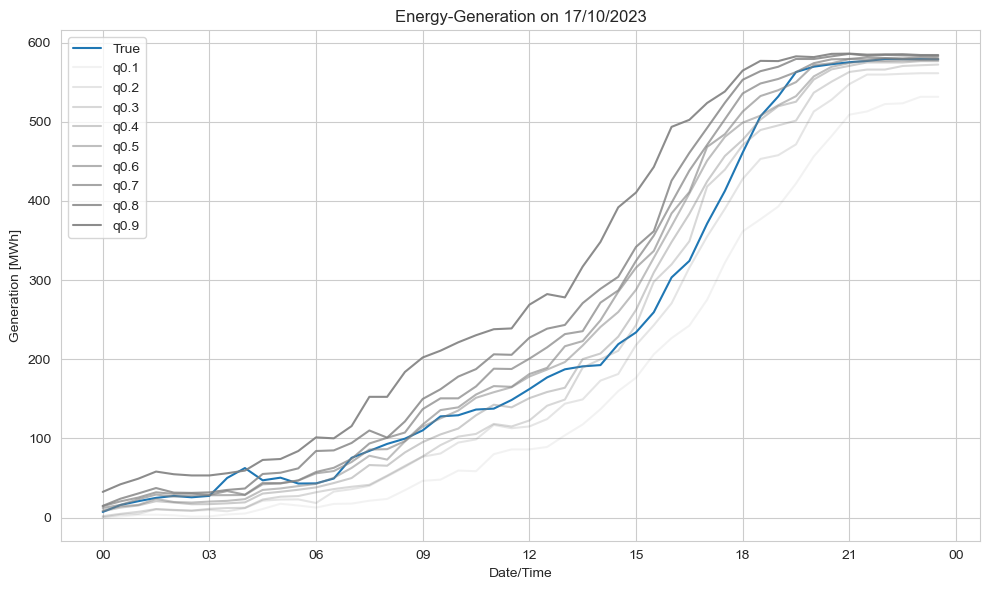

In [126]:
lgbm_model_wind.plot_quantils(feature_engineerer_wind.y_test.index, lgbm_model_wind.q_predictions, quantiles, month=10, day=17)

### __LightGBM solar energy forecast__

In [9]:
quantiles = np.arange(0.1, 1.0, 0.1)
quantiles = np.round(quantiles, 1)

# Specify model save directory
model_save_dir_qr = "lgbm_model_solar"

lgbm_model_solar = model_utils.LGBMRegressorModel(feature_engineerer_solar, quantiles, model_save_dir=model_save_dir_qr, load_pretrained=True)
lgbm_model_solar.train_and_predict()  # This will skip training for already loaded models
print(f"Quantile Regressor Pinball Score: {lgbm_model_solar.pinball_score()}")

Loaded pretrained Quantile Regressor model for quantile 0.1 from lgbm_model_solar\lgbm_model_quantile_0.1.pkl
Loaded pretrained Quantile Regressor model for quantile 0.2 from lgbm_model_solar\lgbm_model_quantile_0.2.pkl
Loaded pretrained Quantile Regressor model for quantile 0.3 from lgbm_model_solar\lgbm_model_quantile_0.3.pkl
Loaded pretrained Quantile Regressor model for quantile 0.4 from lgbm_model_solar\lgbm_model_quantile_0.4.pkl
Loaded pretrained Quantile Regressor model for quantile 0.5 from lgbm_model_solar\lgbm_model_quantile_0.5.pkl
Loaded pretrained Quantile Regressor model for quantile 0.6 from lgbm_model_solar\lgbm_model_quantile_0.6.pkl
Loaded pretrained Quantile Regressor model for quantile 0.7 from lgbm_model_solar\lgbm_model_quantile_0.7.pkl
Loaded pretrained Quantile Regressor model for quantile 0.8 from lgbm_model_solar\lgbm_model_quantile_0.8.pkl
Loaded pretrained Quantile Regressor model for quantile 0.9 from lgbm_model_solar\lgbm_model_quantile_0.9.pkl
Using the 

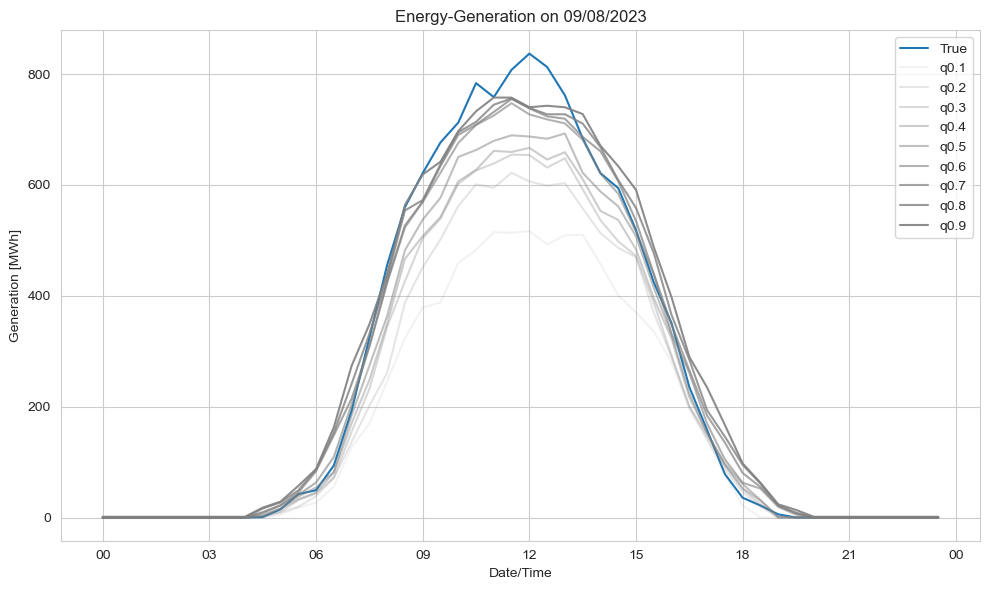

In [10]:
lgbm_model_solar.plot_quantils(feature_engineerer_solar.y_test.index, lgbm_model_solar.q_predictions, quantiles, year=2023, month=8, day=9)

### __Vergleich der Pinball Scores der Modelle__

In [12]:
performance_scores = {'Solarenergie' : [qr_model_solar.pinball_score(), lgbm_model_solar.pinball_score()],
                      'Windenergie' : [qr_model_wind.pinball_score(), lgbm_model_wind.pinball_score()]
                      }
performance_df = pd.DataFrame(performance_scores, index=["baseline", "LightGBM"])
performance_df

,Solarenergie,Windenergie
baseline,11.914653,31.795997
LightGBM,8.938359,21.476032


### __Modell Training all in one Modell__

In [14]:
import model_utils
import pandas as pd
import importlib
importlib.reload(model_utils)

merged_hornsea = pd.read_parquet("preprocessed_hornsea_with_energy.parquet")
merged_pes = pd.read_parquet("preprocessed_pes_with_energy.parquet")

columns_to_add = list()

for col in merged_hornsea.columns:
    if col not in merged_pes.columns:
        columns_to_add.append(col)

merged_all = merged_pes.merge(merged_hornsea[columns_to_add], left_index = True, right_index = True)
merged_all["energy"] = merged_all["Solar_MWh_credit"] + merged_all["Wind_MWh_credit"]
merged_all.drop(["Solar_MWh_credit", "Wind_MWh_credit"], axis = 1, inplace = True)

from Preprocessing import *
feature_engineerer_all = FeatureEngineerer(labels_to_remove=  ["energy"], columns_to_ohe = ['unavailabilityType', 'affectedUnit'], label = ["energy"])
feature_engineerer_all.perform_feature_engineering(merged_all, deployment = False, labels_to_remove=  ["energy"])

import numpy as np
quantiles = np.arange(0.1, 1.0, 0.1).round(2)

# Specify model save directory
model_save_dir_qr = "lgbm_model_all"

lgbm_model = model_utils.LGBMRegressorModel(feature_engineerer_all, quantiles, model_save_dir=model_save_dir_qr, load_pretrained=True)
lgbm_model.train_and_predict()  # This will skip training for already loaded models
print(f"Quantile Regressor Pinball Score: {lgbm_model.pinball_score()}")

Loaded pretrained Quantile Regressor model for quantile 0.1 from lgbm_model_all\lgbm_model_quantile_0.1.pkl
Loaded pretrained Quantile Regressor model for quantile 0.2 from lgbm_model_all\lgbm_model_quantile_0.2.pkl
Loaded pretrained Quantile Regressor model for quantile 0.3 from lgbm_model_all\lgbm_model_quantile_0.3.pkl
Loaded pretrained Quantile Regressor model for quantile 0.4 from lgbm_model_all\lgbm_model_quantile_0.4.pkl
Loaded pretrained Quantile Regressor model for quantile 0.5 from lgbm_model_all\lgbm_model_quantile_0.5.pkl
Loaded pretrained Quantile Regressor model for quantile 0.6 from lgbm_model_all\lgbm_model_quantile_0.6.pkl
Loaded pretrained Quantile Regressor model for quantile 0.7 from lgbm_model_all\lgbm_model_quantile_0.7.pkl
Loaded pretrained Quantile Regressor model for quantile 0.8 from lgbm_model_all\lgbm_model_quantile_0.8.pkl
Loaded pretrained Quantile Regressor model for quantile 0.9 from lgbm_model_all\lgbm_model_quantile_0.9.pkl
Using the loaded pretrained 

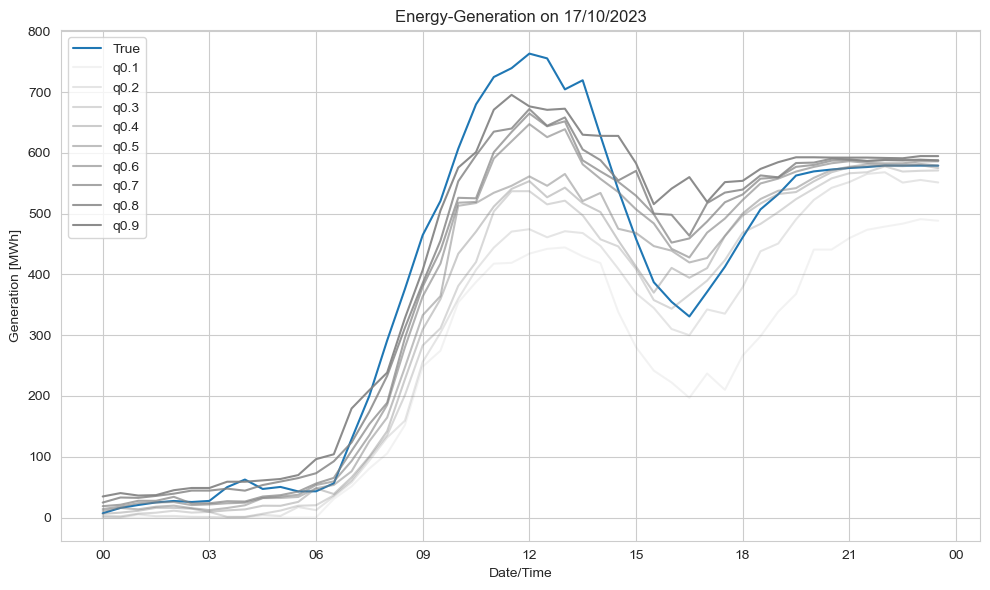

In [48]:
lgbm_model.plot_quantils(feature_engineerer_all.y_test.index, lgbm_model.q_predictions, quantiles, year=2023, month=10, day=17)

### __Combine Solar and Wind Modell for comparison__

In [72]:
solar_energy = lgbm_model_solar.q_predictions
wind_energy = lgbm_model_wind.q_predictions

combined_energy = {key: solar_energy[key] + wind_energy[key] for key in solar_energy}

model_utils.pinball_score(combined_energy, quantiles)

26.09143426874892

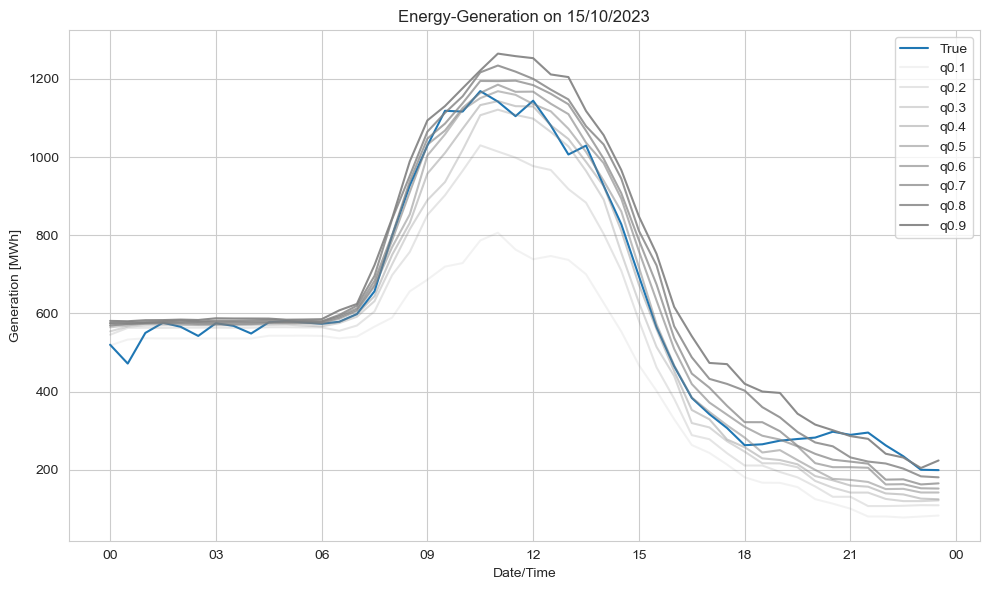

In [278]:
lgbm_model.plot_quantils(feature_engineerer_all.y_test.index, combined_energy, quantiles, year=2023, month=10, day=15)

In [74]:
performance_scores = {'Gesamt_Modell' : [lgbm_model.pinball_score()],
                      'Kombiniertes_Modell' : [model_utils.pinball_score(combined_energy, quantiles)]
                      }
performance_df = pd.DataFrame(performance_scores, index=["total_energy_without_HT"])
performance_df

,Gesamt_Modell,Kombiniertes_Modell
total_energy_without_HT,26.247761,26.091434


### __Use Hyperparametertuning for LightGBM__

__Wind__

In [331]:
importlib.reload(model_utils)
from scipy.stats import randint, uniform

quantiles = np.arange(0.1, 1.0, 0.1)
quantiles = np.round(quantiles, 1)

# Specify model save directory
model_save_dir_qr = "lgbm_model_wind_hyperparameter"

params_distributions = dict(
    num_leaves=randint(low=10, high=50),
    max_depth=randint(low=3, high=20),
    n_estimators=randint(low=100, high=800),
    learning_rate=uniform()
)

lgbm_model_wind_hyperparameter = model_utils.LGBMRegressorModel(feature_engineerer_wind, quantiles, model_save_dir=model_save_dir_qr, load_pretrained=True)
lgbm_model_wind_hyperparameter.train_and_predict_hyperparametertuning(params_distributions, search="RandomSearch")  # This will skip training for already loaded models
print(f"Quantile Regressor Pinball Score: {lgbm_model_wind_hyperparameter.pinball_score()}")

Loaded pretrained Quantile Regressor model for quantile 0.1 from lgbm_model_wind_hyperparameter\lgbm_model_quantile_0.1.pkl
Loaded pretrained Quantile Regressor model for quantile 0.2 from lgbm_model_wind_hyperparameter\lgbm_model_quantile_0.2.pkl
Loaded pretrained Quantile Regressor model for quantile 0.3 from lgbm_model_wind_hyperparameter\lgbm_model_quantile_0.3.pkl
Loaded pretrained Quantile Regressor model for quantile 0.4 from lgbm_model_wind_hyperparameter\lgbm_model_quantile_0.4.pkl
Loaded pretrained Quantile Regressor model for quantile 0.5 from lgbm_model_wind_hyperparameter\lgbm_model_quantile_0.5.pkl
Loaded pretrained Quantile Regressor model for quantile 0.6 from lgbm_model_wind_hyperparameter\lgbm_model_quantile_0.6.pkl
Loaded pretrained Quantile Regressor model for quantile 0.7 from lgbm_model_wind_hyperparameter\lgbm_model_quantile_0.7.pkl
Loaded pretrained Quantile Regressor model for quantile 0.8 from lgbm_model_wind_hyperparameter\lgbm_model_quantile_0.8.pkl
Loaded p

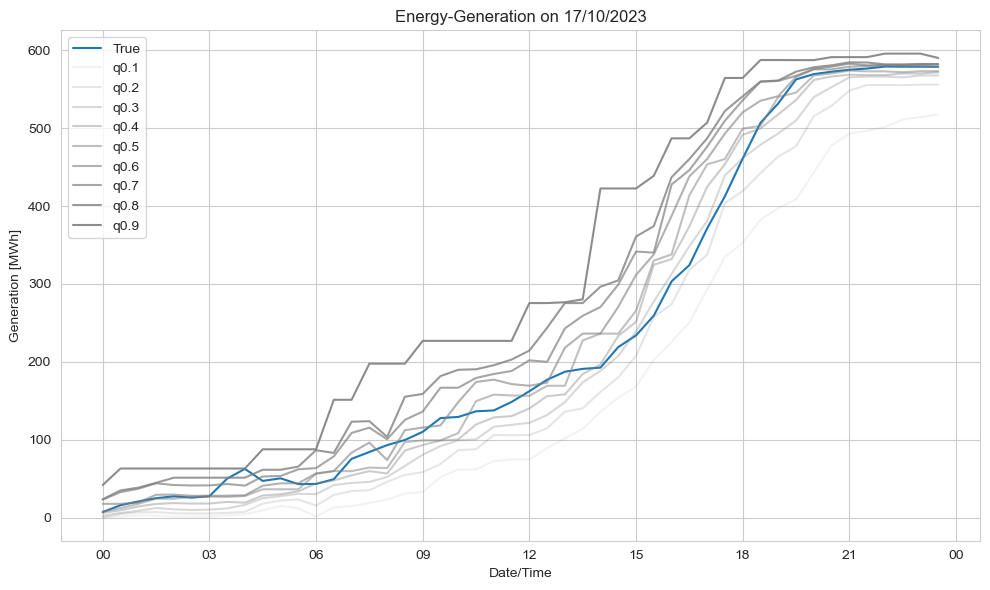

In [323]:
lgbm_model_wind_hyperparameter.plot_quantils(feature_engineerer_wind.y_test.index, lgbm_model_wind_hyperparameter.q_predictions, quantiles, year=2023, month=10, day=17)

__solar__

In [330]:
importlib.reload(model_utils)

quantiles = np.arange(0.1, 1.0, 0.1)
quantiles = np.round(quantiles, 1)

# Specify model save directory
model_save_dir_qr = "lgbm_model_solar_hyperparameter"

params_distributions = dict(
    num_leaves=randint(low=10, high=50),
    max_depth=randint(low=3, high=20),
    n_estimators=randint(low=100, high=800),
    learning_rate=uniform()
)

lgbm_model_solar_hyperparameter = model_utils.LGBMRegressorModel(feature_engineerer_solar, quantiles, model_save_dir=model_save_dir_qr, load_pretrained=True)
lgbm_model_solar_hyperparameter.train_and_predict_hyperparametertuning(params_distributions, search="RandomSearch")  # This will skip training for already loaded models
print(f"Quantile Regressor Pinball Score: {lgbm_model_solar_hyperparameter.pinball_score()}")

Loaded pretrained Quantile Regressor model for quantile 0.1 from lgbm_model_solar_hyperparameter\lgbm_model_quantile_0.1.pkl
Loaded pretrained Quantile Regressor model for quantile 0.2 from lgbm_model_solar_hyperparameter\lgbm_model_quantile_0.2.pkl
Loaded pretrained Quantile Regressor model for quantile 0.3 from lgbm_model_solar_hyperparameter\lgbm_model_quantile_0.3.pkl
Loaded pretrained Quantile Regressor model for quantile 0.4 from lgbm_model_solar_hyperparameter\lgbm_model_quantile_0.4.pkl
Loaded pretrained Quantile Regressor model for quantile 0.5 from lgbm_model_solar_hyperparameter\lgbm_model_quantile_0.5.pkl
Loaded pretrained Quantile Regressor model for quantile 0.6 from lgbm_model_solar_hyperparameter\lgbm_model_quantile_0.6.pkl
Loaded pretrained Quantile Regressor model for quantile 0.7 from lgbm_model_solar_hyperparameter\lgbm_model_quantile_0.7.pkl
Loaded pretrained Quantile Regressor model for quantile 0.8 from lgbm_model_solar_hyperparameter\lgbm_model_quantile_0.8.pkl


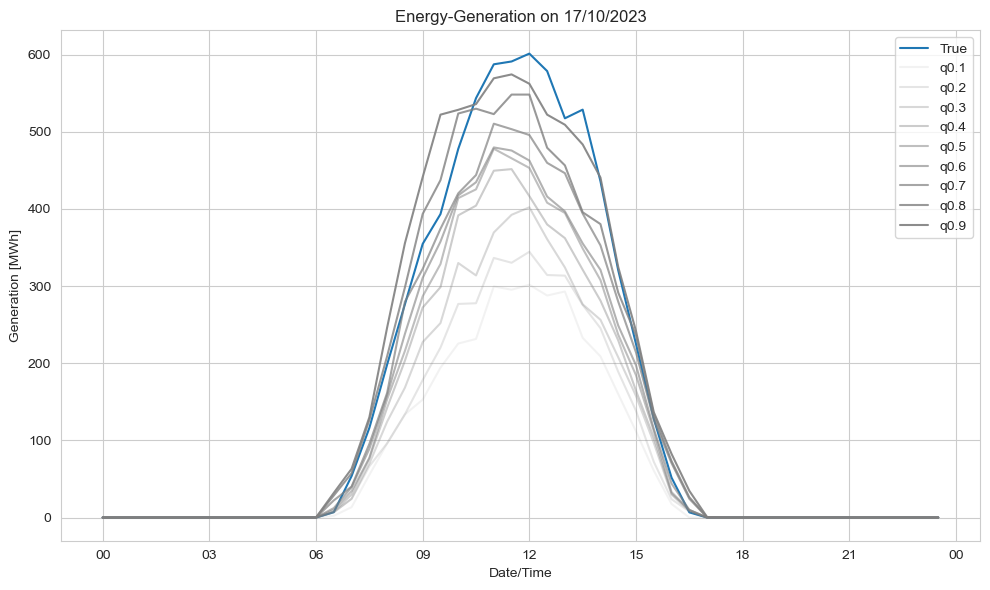

In [325]:
lgbm_model_solar_hyperparameter.plot_quantils(feature_engineerer_solar.y_test.index, lgbm_model_solar_hyperparameter.q_predictions, quantiles, year=2023, month=10, day=17)

In [329]:
performance_scores = {'Solarenergie' : [qr_model_solar.pinball_score(), lgbm_model_solar.pinball_score(), lgbm_model_solar_hyperparameter.pinball_score()],
                      'Windenergie' : [qr_model_wind.pinball_score(), lgbm_model_wind.pinball_score(), lgbm_model_wind_hyperparameter.pinball_score()]
                      }
performance_df = pd.DataFrame(performance_scores, index=["baseline", "LightGBM", "LightGBM_Hyperparametertuning"])
performance_df

,Solarenergie,Windenergie
baseline,11.914653,31.795997
LightGBM,8.938359,21.476032
LightGBM_Hyperparametertuning,9.082620,21.346469


### __conformalized quantile regression__

In [3]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from matplotlib.offsetbox import AnnotationBbox, TextArea
from matplotlib.ticker import FormatStrFormatter
from scipy.stats import randint, uniform
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import KFold, RandomizedSearchCV, train_test_split

from mapie.metrics import (regression_coverage_score,
                           regression_mean_width_score)
from mapie.regression import MapieQuantileRegressor, MapieRegressor
from mapie.subsample import Subsample
random_state = 18
rng = np.random.default_rng(random_state)
round_to = 3

warnings.filterwarnings("ignore")
def sort_y_values(y_test, y_pred, y_pis):
    """
    Sorting the dataset in order to make plots using the fill_between function.
    """
    indices = np.argsort(y_test)
    y_test_sorted = np.array(y_test)[indices]
    y_pred_sorted = y_pred[indices]
    y_lower_bound = y_pis[:, 0, 0][indices]
    y_upper_bound = y_pis[:, 1, 0][indices]
    return y_test_sorted, y_pred_sorted, y_lower_bound, y_upper_bound


def plot_prediction_intervals(
    title,
    axs,
    y_test_sorted,
    y_pred_sorted,
    lower_bound,
    upper_bound,
    coverage,
    width,
    num_plots_idx
):
    """
    Plot of the prediction intervals for each different conformal
    method.
    """
    axs.yaxis.set_major_formatter(FormatStrFormatter('%.0f' + "k"))
    axs.xaxis.set_major_formatter(FormatStrFormatter('%.0f' + "k"))

    lower_bound_ = np.take(lower_bound, num_plots_idx)
    y_pred_sorted_ = np.take(y_pred_sorted, num_plots_idx)
    y_test_sorted_ = np.take(y_test_sorted, num_plots_idx)

    error = y_pred_sorted_-lower_bound_

    warning1 = y_test_sorted_ > y_pred_sorted_+error
    warning2 = y_test_sorted_ < y_pred_sorted_-error
    warnings = warning1 + warning2
    axs.errorbar(
        y_test_sorted_[~warnings],
        y_pred_sorted_[~warnings],
        yerr=np.abs(error[~warnings]),
        capsize=5, marker="o", elinewidth=2, linewidth=0,
        label="Inside prediction interval"
        )
    axs.errorbar(
        y_test_sorted_[warnings],
        y_pred_sorted_[warnings],
        yerr=np.abs(error[warnings]),
        capsize=5, marker="o", elinewidth=2, linewidth=0, color="red",
        label="Outside prediction interval"
        )
    axs.scatter(
        y_test_sorted_[warnings],
        y_test_sorted_[warnings],
        marker="*", color="green",
        label="True value"
    )
    axs.set_xlabel("True house prices in $")
    axs.set_ylabel("Prediction of house prices in $")
    ab = AnnotationBbox(
        TextArea(
            f"Coverage: {np.round(coverage, round_to)}\n"
            + f"Interval width: {np.round(width, round_to)}"
        ),
        xy=(np.min(y_test_sorted_)*3, np.max(y_pred_sorted_+error)*0.95),
        )
    lims = [
        np.min([axs.get_xlim(), axs.get_ylim()]),  # min of both axes
        np.max([axs.get_xlim(), axs.get_ylim()]),  # max of both axes
    ]
    axs.plot(lims, lims, '--', alpha=0.75, color="black", label="x=y")
    axs.add_artist(ab)
    axs.set_title(title, fontweight='bold')

In [5]:
import Preprocessing
import importlib
importlib.reload(Preprocessing)

feature_engineerer_wind_cqr = Preprocessing.FeatureEngineerer(label = 'Wind_MWh_credit', columns_to_ohe = ['unavailabilityType', 'affectedUnit'])
feature_engineerer_wind_cqr.perform_feature_engineering(merged_hornsea, deployment = False, val_year=True)

In [6]:
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit

estimator = LGBMRegressor(
    objective='quantile',
    alpha=0.5,
    random_state=random_state,
    verbose=-1
)
params_distributions = dict(
    num_leaves=randint(low=10, high=50),
    max_depth=randint(low=3, high=20),
    n_estimators=randint(low=50, high=100),
    learning_rate=uniform()
)
optim_model = RandomizedSearchCV(
    estimator,
    param_distributions=params_distributions,
    n_jobs=-1,
    n_iter=10,
    cv=TimeSeriesSplit(n_splits=3),
    random_state=random_state
)
optim_model.fit(feature_engineerer_wind_cqr.X_train, feature_engineerer_wind_cqr.y_train)
estimator = optim_model.best_estimator_

In [70]:
from mapie.regression import MapieQuantileRegressor

alpha = 0.3
mapie = MapieQuantileRegressor(estimator=estimator, cv="split", alpha=alpha)
mapie.fit(feature_engineerer_wind_cqr.X_train, feature_engineerer_wind_cqr.y_train, X_calib=feature_engineerer_wind_cqr.X_val, y_calib=feature_engineerer_wind_cqr.y_val)
y_pred, y_pis = mapie.predict(feature_engineerer_wind_cqr.X_test)

In [71]:
predictions = feature_engineerer_wind_cqr.y_test.to_frame()
predictions.columns = ['y_true']
predictions["point_prediction"] = y_pred
predictions["lower"] = y_pis.reshape(-1,2)[:,0]
predictions["upper"] = y_pis.reshape(-1,2)[:,1]
# take a quick look
# predictions.clip(lower=0, inplace=True)

In [72]:
predictions

,y_true,point_prediction,lower,upper
dtm,,,,
2023-07-01 00:00:00+00:00,518.961,503.893593,401.513170,572.367550
2023-07-01 00:30:00+00:00,508.881,503.004646,401.513170,572.280310
2023-07-01 01:00:00+00:00,464.601,498.928005,401.513170,571.591409
2023-07-01 01:30:00+00:00,459.261,501.679955,401.513170,570.981396
2023-07-01 02:00:00+00:00,478.631,502.568902,390.029587,571.381509
...,...,...,...,...
2023-12-31 21:30:00+00:00,566.130,549.949391,518.671288,580.769749
2023-12-31 22:00:00+00:00,560.100,549.949391,518.671288,582.973773
2023-12-31 22:30:00+00:00,572.640,551.322001,518.671288,582.915965


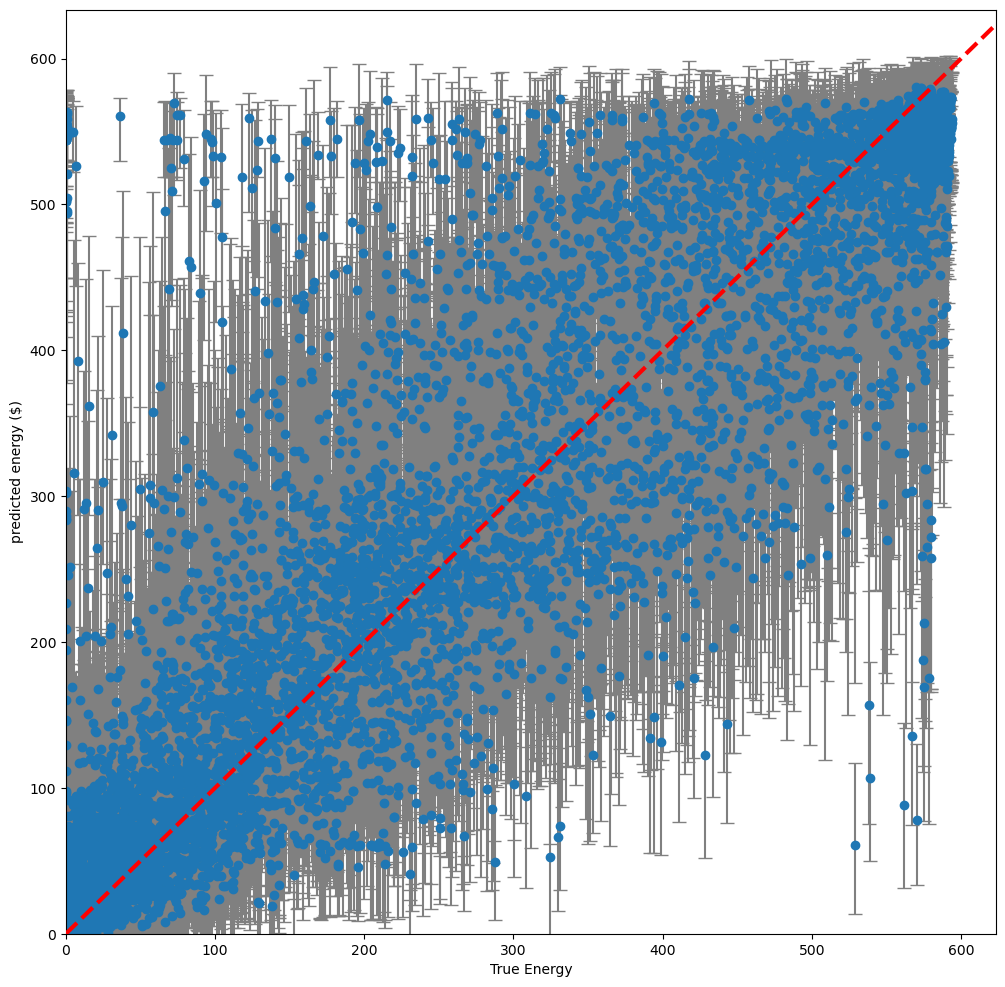

In [73]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))

plt.errorbar(predictions["y_true"], predictions["point_prediction"], 
             yerr=(predictions["point_prediction"]-predictions["lower"], predictions["upper"]-predictions["point_prediction"]),
             ecolor='grey', linestyle='', marker = "o", capsize=5)

ax.axline([0, 0], [1, 1], color = "red", linestyle='--', lw=3, zorder=3)
plt.xlim(0)
plt.ylim(0)
plt.xlabel('True Energy')
plt.ylabel('predicted energy ($)')
plt.show()

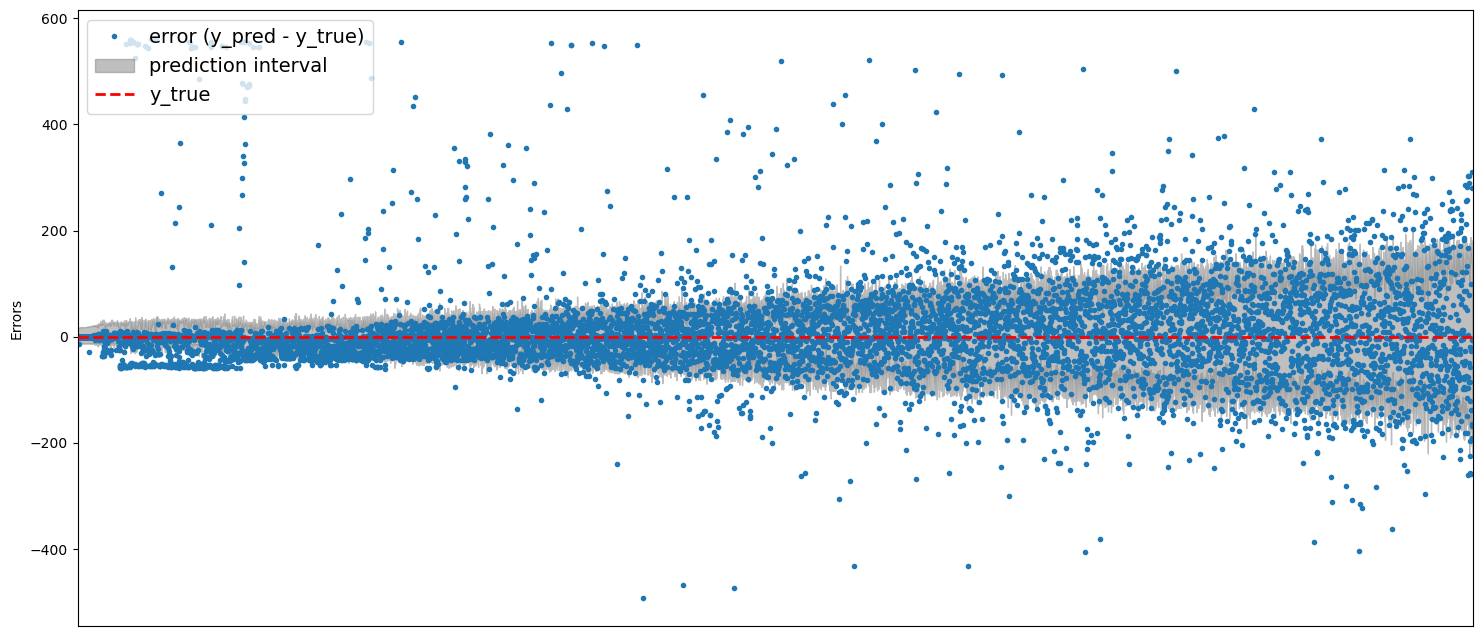

In [74]:
predictions["error"] = predictions["point_prediction"] - predictions["y_true"]

predictions["error_upper"] =   (predictions["upper"] - predictions["point_prediction"])
predictions["error_lower"] =  -(predictions["point_prediction"] - predictions["lower"])

# sort by total interval width
predictions["interval_width"] = predictions["upper"] - predictions["lower"]
sorted_predictions = predictions.sort_values(by=['interval_width']).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(18, 8))

plt.plot(sorted_predictions["error"], 'o', markersize=3, label="error (y_pred - y_true)")

plt.fill_between(np.arange(len(sorted_predictions)),
                 sorted_predictions["error_lower"], 
                 sorted_predictions["error_upper"], 
                 alpha=0.5, color="grey", label="prediction interval")

ax.axline([0, 0], [1, 0], color = "red", linestyle='--', lw=2, zorder=3, label="y_true")
plt.xticks([])
plt.xlim([0, len(sorted_predictions)])
plt.ylabel("Errors")
plt.legend(loc="upper left", fontsize=14)
plt.show()